# **Machine Learning**
Lab04 - K-Means Clustering (Unsupervised Learning)



# KMeans with Blob Data

**Import Libraries**

In [ ]:
!pip install kneed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

**Generate Synthetic Data and Labels**

In [ ]:
features, true_labels = make_blobs(
    n_samples = 200,
    centers = 3,
    cluster_std = 2.75,
    random_state = None
)

**Display x and y Coordinates of First 5 Data Points**

In [ ]:
features[:5]

array([[ -7.48359815, -13.77501028],
       [ -8.58782796,  -3.39641471],
       [-11.98341832, -10.00528604],
       [ -2.87968468,   9.76031871],
       [ -8.80440932,   7.50673672]])

**Display The Cluster Labels Assigned to First 5 Data Points**

In [ ]:
true_labels[:5]

array([0, 1, 1, 2, 2])

**Data Preprocessing via Feature Scaling**

Data sets usually contain numerical features that have been measured in different units, such as height (in cm) and weight (in kg). A machine learning algorithm would consider height more important than weight only because the values for height are larger and have higher variability from person to person.

Machine learning algorithms need to consider all features on an even playing field. That means the values for all features must be transformed to the same scale.

In this tutorial, we will use the **StandardScaler** class. This class implements a type of feature scaling called **Standardization**. Standardization scales, or shifts, the values for each numerical feature in your dataset so that the features have a mean of 0 and standard deviation of 1

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

**Display x and y Coordinates of First 5 Data Points After Processing**

In [ ]:
scaled_features[:5]

array([[-0.2270237 , -1.51318448],
       [-0.54021814, -0.18936772],
       [-1.50331478, -1.03234638],
       [ 1.07879152,  1.48880773],
       [-0.60164745,  1.2013575 ]])

**Instantiate KMeans**

In [ ]:
kmeans = KMeans(
    init = "random",
    n_clusters = 3,
    n_init = 10,
    max_iter = 300,
    random_state = None
)

# Parameters
# init (Controls initialization technique): "random", "k-means++"
# n_clusters (Sets k for the clustering step)
# n_init (Sets the number of initializations to perform)
# max_iter (Sets the number of maximum iterations for each initialization of the KMeans algorithm)
# random_state (Sets the seed for KMeans)

**Run KMeans on Processed Data**

In [ ]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10)

**Display Details from The Results**

In [ ]:
# The Lowest SSE Value
# SSE = Sum of The Squared Euclidean Distances of Each Point to its Closest Centroid
kmeans.inertia_

96.05455217452129

In [ ]:
# Final Locations of The Centroid
kmeans.cluster_centers_

array([[ 0.94995963,  1.32644577],
       [ 0.13182919, -0.6573157 ],
       [-1.05539941, -0.61972399]])

In [ ]:
# The Number of Iterations Required to Converge
kmeans.n_iter_

8

In [ ]:
# First 5 Predicted Labels
kmeans.labels_[:5]

array([1, 2, 2, 0, 0], dtype=int32)

**Run Multiple KMeans for Drawing Elbow Graph**

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": None,
}

sse = []
for k in range(1,11):
  kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

**Plot the Elbow Graph**

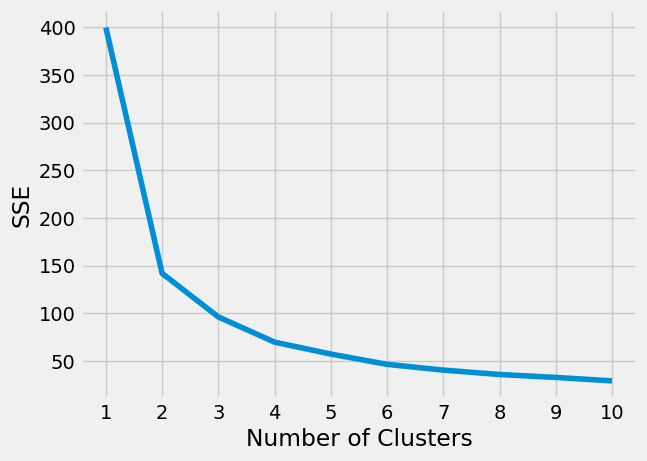

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

**Identify Elbow Point**

In [ ]:
kl = KneeLocator(
    range(1,11),
    sse,
    curve = "convex",
    direction = "decreasing"
)
kl.elbow

3

# KMeans with Real World Data

**Import Libraries**

In [ ]:
import tarfile
import urllib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

**Download Dataset**

We will be using The Cancer Genome Atlas (TCGA) Pan-Cancer analysis dataset from UC Irvine Machine Learning Repository.

In [ ]:
uci_tcga_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00401/"
archive_name = "TCGA-PANCAN-HiSeq-801x20531.tar.gz"

# Build the url
full_download_url = urllib.parse.urljoin(uci_tcga_url, archive_name)

# Download the file
r = urllib.request.urlretrieve (full_download_url, archive_name)

# Extract the data from the archive
tar = tarfile.open(archive_name, "r:gz")
tar.extractall()
tar.close()

**Load Dataset**

In [ ]:
datafile = "TCGA-PANCAN-HiSeq-801x20531/data.csv"
labels_file = "TCGA-PANCAN-HiSeq-801x20531/labels.csv"

data = np.genfromtxt(
    datafile,
    delimiter=",",
    usecols=range(1, 20532),
    skip_header=1
)

true_label_names = np.genfromtxt(
    labels_file,
    delimiter=",",
    usecols=(1,),
    skip_header=1,
    dtype="str"
)

**View Details from Dataset**

In [ ]:
#  First 3 Columns of Data for The First 5 Samples
data[:5, :3]

array([[0.        , 2.01720929, 3.26552691],
       [0.        , 0.59273209, 1.58842082],
       [0.        , 3.51175898, 4.32719872],
       [0.        , 3.66361787, 4.50764878],
       [0.        , 2.65574107, 2.82154696]])

In [ ]:
# Labels for The First 5 Samples
true_label_names[:5]

# BRCA: Breast invasive carcinoma
# COAD: Colon adenocarcinoma
# KIRC: Kidney renal clear cell carcinoma
# LUAD: Lung adenocarcinoma
# PRAD: Prostate adenocarcinoma

array(['PRAD', 'LUAD', 'PRAD', 'PRAD', 'BRCA'], dtype='<U4')

**Dummify Labels (Convert String to Int)**

In [ ]:
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(true_label_names)
true_labels[:5]

array([4, 3, 4, 4, 0])

**Assign Total Number of Labels as Number of Clusters**

In [ ]:
n_clusters = len(label_encoder.classes_)

**Build Preprocessing Pipeline**

In practical machine learning pipelines, it’s common for the data to undergo multiple sequences of transformations before it feeds into a clustering algorithm. You learned about the importance of one of these transformation steps, feature scaling, earlier in this tutorial. An equally important data transformation technique is dimensionality reduction, which reduces the number of features in the dataset by either removing or combining them.

Dimensionality reduction techniques help to address a problem with machine learning algorithms known as the curse of dimensionality. In short, as the number of features increases, the feature space becomes sparse. This sparsity makes it difficult for algorithms to find data objects near one another in higher-dimensional space. Since the gene expression dataset has over 20,000 features, it qualifies as a great candidate for dimensionality reduction.

Principal Component Analysis (PCA) is one of many dimensionality reduction techniques. PCA transforms the input data by projecting it into a lower number of dimensions called components. The components capture the variability of the input data through a linear combination of the input data’s features.

In [ ]:
# Implement the PCA class to perform dimensionality reduction
# By setting the PCA parameter n_components=2, we squished all the features into two components/dimensions.
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components = 2, random_state = None)),
    ]
)

In [ ]:
# Perform k-means clustering
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=n_clusters,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=None,
           ),
       ),
   ]
)

In [ ]:
# Combine PCA and K-Means Clustering
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

**Run Preprocessing Pipeline**

In [ ]:
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca', PCA(n_components=2))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5,
                                         n_init=50))]))])

**Evaluate Pipeline Performance**

In [ ]:
preprocessed_data = pipe["preprocessor"].transform(data)
predicted_labels = pipe["clusterer"]["kmeans"].labels_

In [ ]:
# Using Silhouette Coefficient
# Output = 0: Clusters are significantly overlapping one another
# Output = 1: Clusters are well-separated
silhouette_score(preprocessed_data, predicted_labels)

0.5118775536204208

In [ ]:
# Using Adjusted Rand Index (ARI)
# Output = 0: Cluster labels are randomly assigned
# Output = 1: True labels and predicted labels form identical clusters
adjusted_rand_score(true_labels, predicted_labels)

0.722276752060253

**Visualize Clustering**

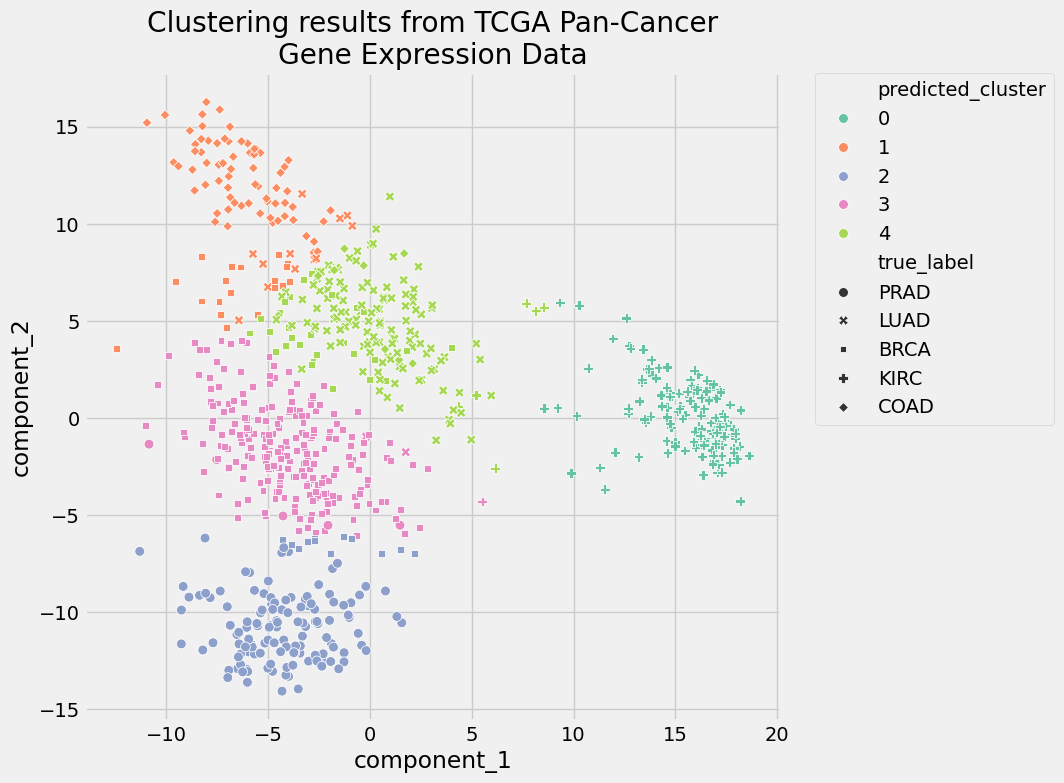

In [ ]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(data),
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    x="component_1",
    y="component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Set2",
)

scat.set_title(
    "Clustering results from TCGA Pan-Cancer\nGene Expression Data"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

# Tuning KMeans Clustering Pipeline

The process of parameter tuning consists of sequentially altering one of the input values of the algorithm’s parameters and recording the results. At the end of the parameter tuning process, you’ll have a set of performance scores, one for each new value of a given parameter. Parameter tuning is a powerful method to maximize performance from your clustering pipeline.

By setting the PCA parameter n_components=2, we squished all the features into two components, or dimensions. This value was convenient for visualization on a two-dimensional plot. But using only two components means that the PCA step won’t capture all of the explained variance of the input data.

In this tutorial, you’ll use clustering performance metrics to identify the appropriate number of components in the PCA step.

**Perform Evaluation via Iterations**

Iterate over a range of n_components and record evaluation metrics for each iteration.

In [ ]:
# Empty lists to hold evaluation metrics
silhouette_scores = []
ari_scores = []
for n in range(2, 11):
    # This set the number of components for pca,
    # but leaves other steps unchanged
    pipe["preprocessor"]["pca"].n_components = n
    pipe.fit(data)

    silhouette_coef = silhouette_score(
        pipe["preprocessor"].transform(data),
        pipe["clusterer"]["kmeans"].labels_,
    )
    ari = adjusted_rand_score(
        true_labels,
        pipe["clusterer"]["kmeans"].labels_,
    )

    # Add metrics to their lists
    silhouette_scores.append(silhouette_coef)
    ari_scores.append(ari)

**Plot Evaluation Metrics**

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6, 6))
plt.plot(
    range(2, 11),
    silhouette_scores,
    c="#008fd5",
    label="Silhouette Coefficient",
)
plt.plot(range(2, 11), ari_scores, c="#fc4f30", label="ARI")

plt.xlabel("n_components")
plt.legend()
plt.title("Clustering Performance as a Function of n_components")
plt.tight_layout()
plt.show()

# Result
# 1.  The silhouette coefficient decreases linearly.
#     The silhouette coefficient depends on the distance between points, so as the number of dimensions increases, the sparsity increases.
# 2.  The ARI improves significantly as you add components.
#     It appears to start tapering off after n_components=7, so that would be the value to use for presenting the best clustering results from this pipeline.